<a href="https://colab.research.google.com/github/AdityaAdak8085/CarDheko-EDA/blob/main/CarDheko_Data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/1719219756-car_Dekho_DA (1).csv')

**Data Cleaning**

In [ ]:
df.isnull().sum()
#no null values in the data

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [ ]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [ ]:
#datatypes of each columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
df.shape

(301, 9)

<Axes: >

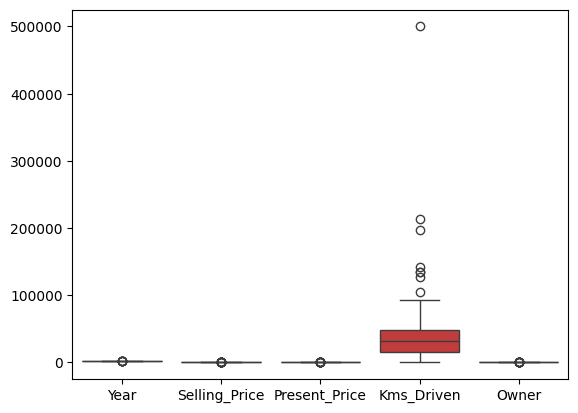

In [ ]:
#removing Outliers From Data
sns.boxplot(df[["Year"	,"Selling_Price",	"Present_Price"	,"Kms_Driven"	,"Owner"]])

<Axes: >

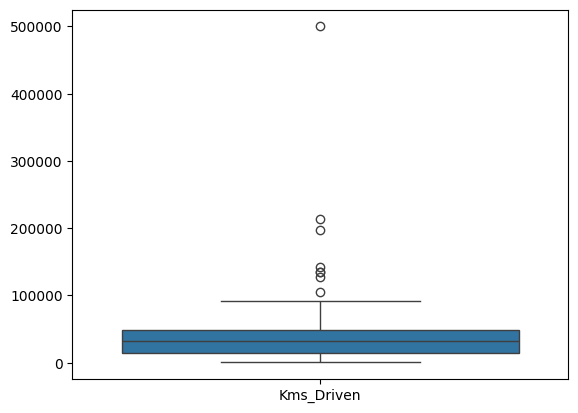

In [ ]:
sns.boxplot(df[["Kms_Driven"]])

In [ ]:
df[["Kms_Driven"]].max()

Kms_Driven    500000
dtype: int64

In [ ]:
df = df[df["Kms_Driven"]< 500000]

<Axes: >

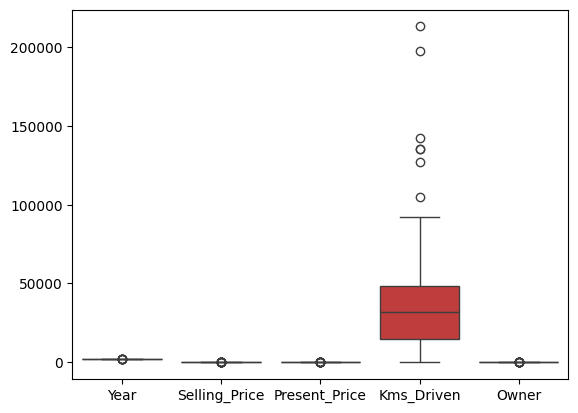

In [ ]:
sns.boxplot(df[["Year"	,"Selling_Price",	"Present_Price"	,"Kms_Driven"	,"Owner"]])

In [ ]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


**Exploartory Data Analysis**

In [ ]:
#cars  with less Kms_Driven
df.loc[df["Kms_Driven"] < 150000, "Car_Name"].unique()

array(['ritz', 'sx4', 'ciaz', 'wagon r', 'swift', 'vitara brezza',
       's cross', 'alto 800', 'ertiga', 'dzire', 'alto k10', 'ignis',
       '800', 'baleno', 'omni', 'fortuner', 'innova', 'corolla altis',
       'etios cross', 'etios g', 'etios liva', 'corolla', 'etios gd',
       'camry', 'land cruiser', 'Royal Enfield Thunder 500',
       'UM Renegade Mojave', 'KTM RC200', 'Bajaj Dominar 400',
       'Royal Enfield Classic 350', 'KTM RC390', 'Hyosung GT250R',
       'Royal Enfield Thunder 350', 'KTM 390 Duke ',
       'Mahindra Mojo XT300', 'Bajaj Pulsar RS200',
       'Royal Enfield Bullet 350', 'Royal Enfield Classic 500',
       'Bajaj Avenger 220', 'Bajaj Avenger 150', 'Honda CB Hornet 160R',
       'Yamaha FZ S V 2.0', 'Yamaha FZ 16', 'TVS Apache RTR 160',
       'Bajaj Pulsar 150', 'Honda CBR 150', 'Hero Extreme',
       'Bajaj Avenger 220 dtsi', 'Bajaj Avenger 150 street',
       'Yamaha FZ  v 2.0', 'Bajaj Pulsar  NS 200', 'Bajaj Pulsar 220 F',
       'TVS Apache RTR 180', 

In [ ]:
df.groupby("Car_Name")["Selling_Price"].mean().nlargest(5)

Car_Name
land cruiser    35.000000
fortuner        18.685455
innova          12.777778
creta           11.800000
elantra         11.600000
Name: Selling_Price, dtype: float64

In [ ]:
df.groupby("Car_Name")["Selling_Price"].mean().nsmallest(5)

Car_Name
Bajaj Discover 125    0.175
Bajaj  ct 100         0.180
Hero  CBZ Xtreme      0.200
Hero  Ignitor Disc    0.200
Hero Hunk             0.200
Name: Selling_Price, dtype: float64

In [ ]:
df.groupby("Car_Name")["Kms_Driven"].mean().nsmallest(5)

Car_Name
Activa 3g              500.000000
Bajaj Dominar 400     1200.000000
Activa 4g             1300.000000
UM Renegade Mojave    1400.000000
Bajaj Avenger 220     1766.666667
Name: Kms_Driven, dtype: float64

In [ ]:
df[["Year"	,"Selling_Price",	"Present_Price"	,"Kms_Driven"	,"Owner"]].corr()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
Year,1.000000,0.232166,-0.053336,-0.620167,-0.184419
Selling_Price,0.232166,1.000000,0.878693,0.088899,-0.088980
Present_Price,-0.053336,0.878693,1.000000,0.326385,0.007587
Kms_Driven,-0.620167,0.088899,0.326385,1.000000,0.132613
Owner,-0.184419,-0.088980,0.007587,0.132613,1.000000


Text(0, 0.5, 'Mean Selling Price')

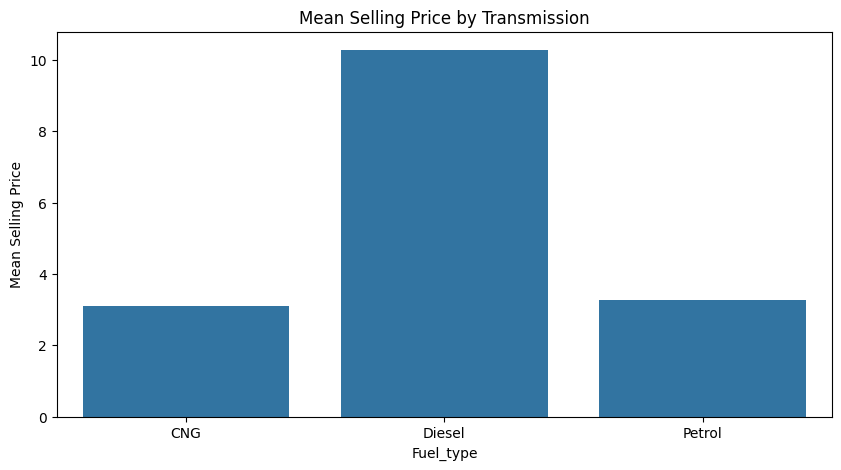

In [ ]:
mean_selling_price_fuel = df.groupby("Fuel_Type")["Selling_Price"].mean().reset_index()
plt.figure(figsize=(10, 5))
sns.barplot(x="Fuel_Type", y="Selling_Price", data=mean_selling_price_fuel)

# Adding title and labels
plt.title('Mean Selling Price by Transmission')
plt.xlabel('Fuel_type')
plt.ylabel('Mean Selling Price')

In [ ]:
mean_selling_price = df.groupby("Transmission")["Selling_Price"].mean().reset_index()

Text(0, 0.5, 'Mean Selling Price')

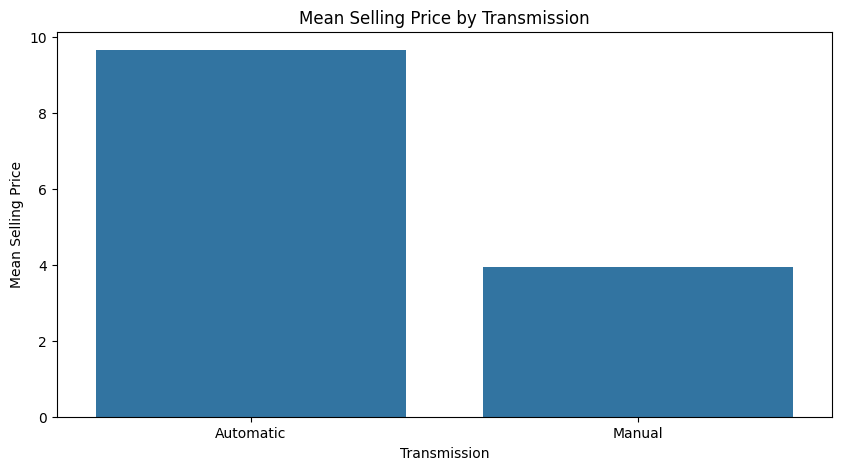

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(x="Transmission", y="Selling_Price", data=mean_selling_price)

# Adding title and labels
plt.title('Mean Selling Price by Transmission')
plt.xlabel('Transmission')
plt.ylabel('Mean Selling Price')

In [ ]:
df['Year'].unique()

array([2014, 2013, 2017, 2011, 2018, 2015, 2016, 2009, 2010, 2012, 2003,
       2008, 2006, 2005, 2004, 2007])

In [ ]:
df.groupby('Year')["Car_Name"].count()

Year
2003     2
2004     1
2005     4
2006     4
2007     2
2008     6
2009     6
2010    15
2011    19
2012    23
2013    33
2014    38
2015    61
2016    50
2017    35
2018     1
Name: Car_Name, dtype: int64

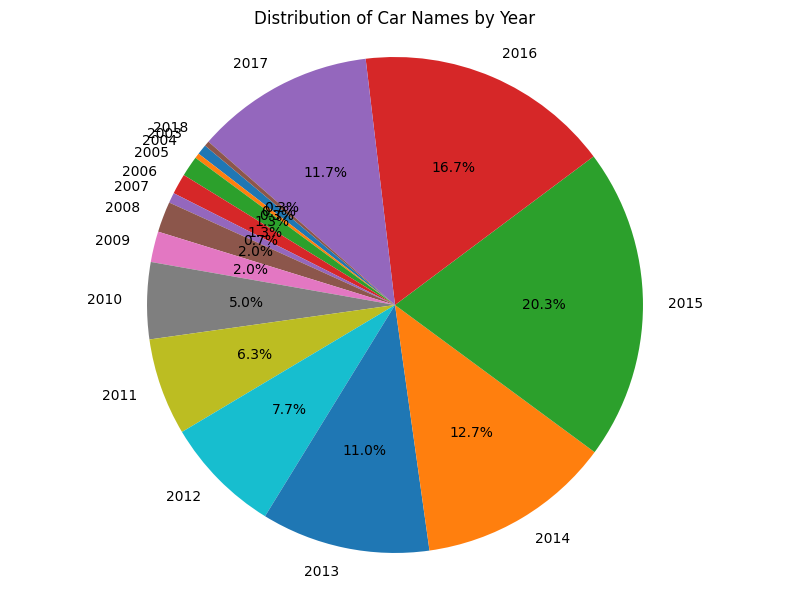

In [ ]:

data = df.groupby('Year')['Car_Name'].count()
plt.figure(figsize=(8, 6))
plt.pie(data.values, labels=data.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Car Names by Year')
plt.axis('equal')
plt.tight_layout()
plt.show()




In [ ]:
df["price_diff"] = df["Present_Price"]-df["Selling_Price"]

In [ ]:

df["price_diff"].max(),df["price_diff"].min()

(57.599999999999994, 0.030000000000000027)

In [ ]:
df.loc[df["price_diff"]<1,"Car_Name"].unique()

array(['vitara brezza', 'ciaz', 'alto 800', 'ignis', 'alto k10', 'swift',
       'corolla altis', 'innova', 'Royal Enfield Thunder 500',
       'UM Renegade Mojave', 'KTM RC200', 'Bajaj Dominar 400',
       'Royal Enfield Classic 350', 'Royal Enfield Thunder 350',
       'Mahindra Mojo XT300', 'Bajaj Pulsar RS200',
       'Royal Enfield Bullet 350', 'Royal Enfield Classic 500',
       'Bajaj Avenger 220', 'Bajaj Avenger 150', 'Honda CB Hornet 160R',
       'Yamaha FZ S V 2.0', 'Yamaha FZ 16', 'TVS Apache RTR 160',
       'Bajaj Pulsar 150', 'Honda CBR 150', 'Hero Extreme',
       'Bajaj Avenger 220 dtsi', 'Bajaj Avenger 150 street',
       'Yamaha FZ  v 2.0', 'Bajaj Pulsar  NS 200', 'Bajaj Pulsar 220 F',
       'TVS Apache RTR 180', 'Hero Passion X pro', 'Bajaj Pulsar NS 200',
       'Yamaha Fazer ', 'Honda Activa 4G', 'TVS Sport ',
       'Honda Dream Yuga ', 'Bajaj Avenger Street 220',
       'Hero Splender iSmart', 'Activa 3g', 'Hero Passion Pro',
       'Honda CB Trigger', 'Yamaha 

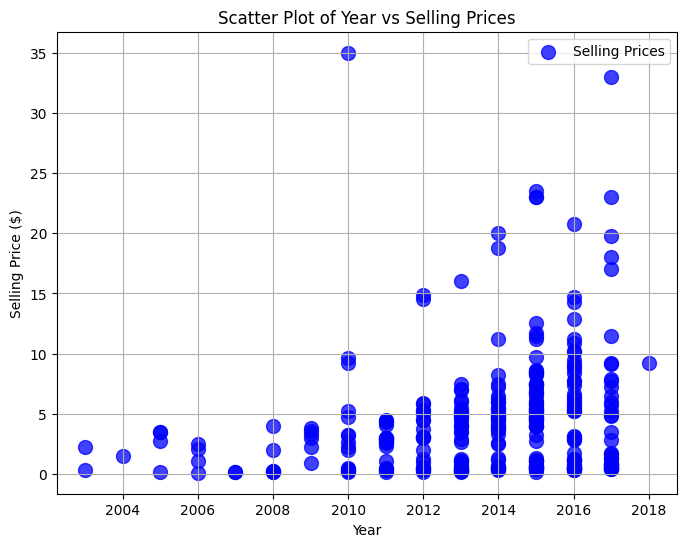

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(df["Year"],df["Selling_Price"], color='blue', marker='o', s=100, alpha=0.75, label='Selling Prices')
plt.title('Scatter Plot of Year vs Selling Prices')
plt.xlabel('Year')
plt.ylabel('Selling Price ($)')
plt.legend()
plt.grid(True)
plt.show()

**Insight from the Data**

In [ ]:
# Certainly! Here are the insights drawn from the data, rewritten for clarity and coherence:

#1 Car with the Least Driving Kilometers: Identified the car with the lowest recorded mileage.

#2 Highest and Lowest Selling Prices: Analyzed and determined the cars with the highest and lowest selling prices.

#3 Selling Price Variation Across Fuel Types: Explored how selling prices vary based on different fuel types.

#4 Selling Price Variation Across Transmission Types: Investigated the relationship between selling prices and different types of transmissions.

#5 Yearly Distribution of Car Sales: Examined the count of cars sold per year to understand sales trends over time.

#6 Cars with Minimal Difference Between Actual and Selling Prices: Identified cars where the difference between their actual and selling prices was minimal.

#7 Relationship Between Year of Manufacture and Selling Price: Explored how the year of manufacture influences the selling price of cars.

#8 These insights provide a comprehensive view of various aspects within the dataset, shedding light on factors influencing both car sales and pricing dynamics.